# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     787.2
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.60e-39
Time:                        10:42:48   Log-Likelihood:                -4.1293
No. Observations:                  50   AIC:                             16.26
Df Residuals:                      46   BIC:                             23.91
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9084      0.093     52.559      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.40661361  4.92030729  5.38985724  5.78396131  6.08261411  6.2803939
  6.3873533   6.4273677   6.43421264  6.4460145   6.49898652  6.62147904
  6.8293216   7.12322222  7.48865107  7.89822767  8.31621941  8.70441236
  9.02838968  9.26318621  9.39739018  9.43501814  9.39485504  9.30736792
  9.20970026  9.13956942  9.12906977  9.19939969  9.35737872  9.59432715
  9.88749206 10.20378555 10.505221   10.75515418 10.92430376 10.99556217
 10.96680633 10.85124644 10.67525561 10.47403683 10.2858392  10.14567371
 10.07956107 10.10025654 10.20515429 10.37671555 10.58535013 10.79427808
 10.96557246 11.06639067]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.06222541 10.90784675 10.62577896 10.26735197  9.90013405  9.59138869
  9.39160621  9.32214193  9.36998766  9.49095654]


## Plot comparison

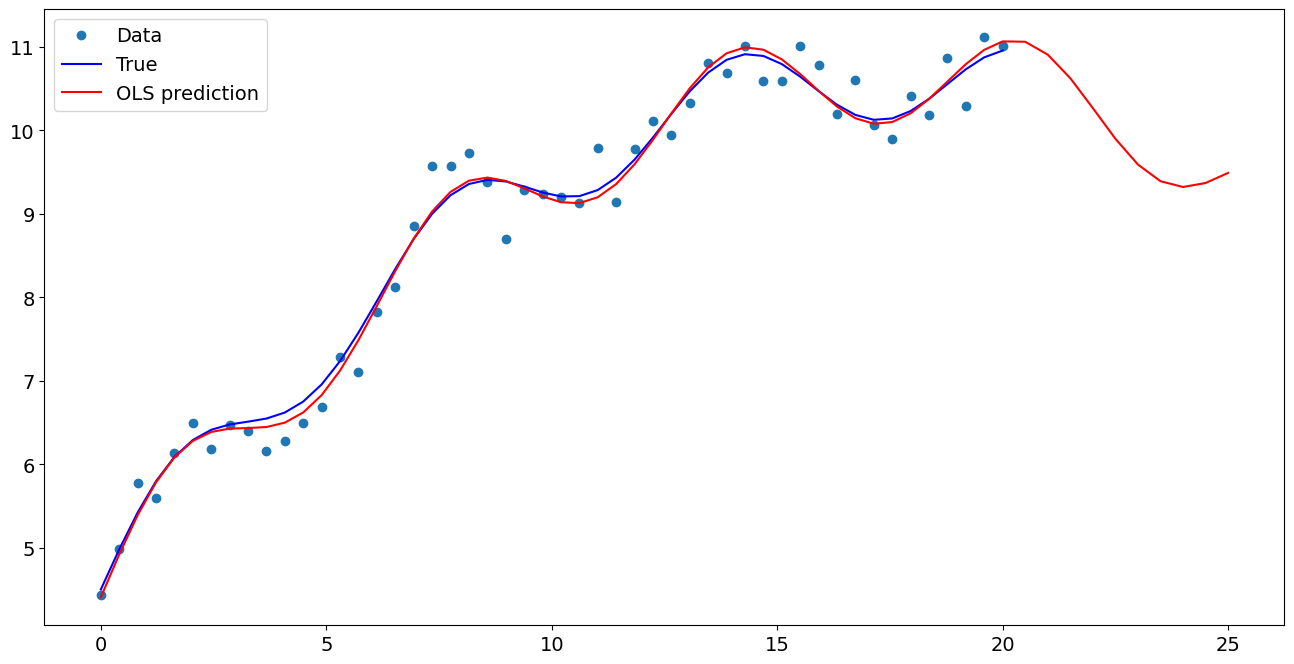

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.908396
x1                  0.507484
np.sin(x1)          0.574361
I((x1 - 5) ** 2)   -0.020071
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.062225
1    10.907847
2    10.625779
3    10.267352
4     9.900134
5     9.591389
6     9.391606
7     9.322142
8     9.369988
9     9.490957
dtype: float64